**1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**2. Load Dataset**

In [3]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**3. Text Preprocessing**

In [4]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word.isalpha() and word not in stop_words
    ]
    return " ".join(cleaned_tokens)

**4. Apply Processing**

In [7]:
df['cleaned_review'] = df['review'].apply(preprocess_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
df.head()

,review,sentiment,cleaned_review,label
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,1


**5. TF-IDF Vectorization**

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['label']

**6. Train/Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**7. Train Logistic Regression**

In [11]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [12]:
lr_preds = lr_model.predict(X_test)

print("Logistic Regression Performance:\n")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Performance:

Accuracy: 0.8862
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**8. Confusion matrix**

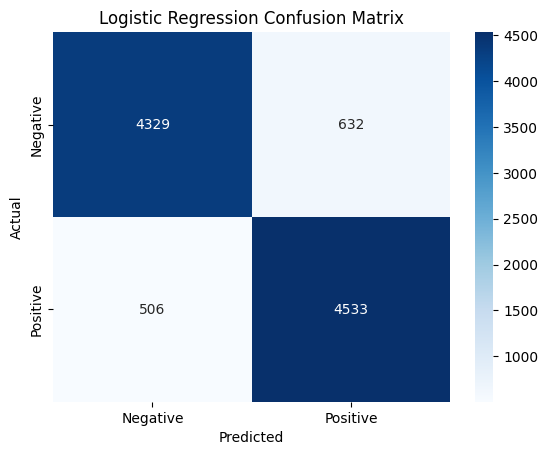

In [14]:
lr_cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()